# Skyrim Weapons

#### Video oyun olan Skrim oyunundaki silahların istatisliklerinin incelediğim bir proje 
###### Projede Silahların Gold değerinin hangi sebeplerden dolayı değiştiğini inceleyeceğim.Makine öğrenmesi ile siahın Gold değerinin belirlemeye çalışacağız

In [344]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("Skyrim_Weapons.csv")
dataset

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN
...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
289,Exploding Steel Bolt of Shock,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
290,Exploding Dwarven Bolt of Fire,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
291,Exploding Dwarven Bolt of Ice,14,0.0,15,NaN,NaN,Bolt,Archery,NaN


Skyrim_Weapons Datasetimde 293 satır 9 sütun var
sütunlar sırasıyla Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed


******************************************
df.rename(columns=
{'Sütun_İsmi':'Yeni_Sütun_İsmi'},
inplace=True) 
şeklinde yazarak sütunların ismini değiştire biliriz

In [345]:
df = dataset.copy()
df.head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN


In [346]:
dataset.tail()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
288,Exploding Steel Bolt of Ice,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
289,Exploding Steel Bolt of Shock,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
290,Exploding Dwarven Bolt of Fire,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
291,Exploding Dwarven Bolt of Ice,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
292,Exploding Dwarven Bolt of Shock,14,0.0,15,NaN,NaN,Bolt,Archery,NaN


In [347]:
df["Category"].value_counts()

One-Handed    161
Archery        71
Two-Handed     61
Name: Category, dtype: int64

In [348]:
df["Type"].value_counts()

Sword         76
Bow           39
War Axe       37
Dagger        25
Battleaxe     22
Mace          21
Greatsword    20
Arrow         20
Warhammer     19
Bolt           8
Crossbow       4
Silverware     2
Name: Type, dtype: int64

Type sütununda hangi değişkenden kaç tane olduğunu görüyoruz 

In [349]:
df["Perk"].value_counts()

Steel       70
None        41
-           27
Dwarven     26
Ebony       16
Glass       16
Elven       13
Daedric     10
Orcish      10
Dragon       8
Advanced     8
–            6
Name: Perk, dtype: int64

Perk sütunundan hangi değerinden kaçtane olduğunu görmek için

In [350]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      293 non-null    object 
 1   Damage    293 non-null    int64  
 2   Weight    293 non-null    float64
 3   Gold      293 non-null    int64  
 4   Upgrade   232 non-null    object 
 5   Perk      251 non-null    object 
 6   Type      293 non-null    object 
 7   Category  293 non-null    object 
 8   Speed     39 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.7+ KB


In [351]:
dataset.Type = pd.Categorical(dataset.Type)
dataset.Upgrade = pd.Categorical(dataset.Upgrade)
dataset.Perk = pd.Categorical(dataset.Perk)
dataset.Category = pd.Categorical(dataset.Category)
df=dataset.copy()
dataset.info()
#ilk etapta object olarak görünen method değişkenini kategorik değişkene çevirelim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      293 non-null    object  
 1   Damage    293 non-null    int64   
 2   Weight    293 non-null    float64 
 3   Gold      293 non-null    int64   
 4   Upgrade   232 non-null    category
 5   Perk      251 non-null    category
 6   Type      293 non-null    category
 7   Category  293 non-null    category
 8   Speed     39 non-null     float64 
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 14.3+ KB


veri setinin sütunları hakkında bilgiler veriyor

In [352]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Damage,293.0,13.017065,5.692736,0.0,9.000,12.00,17.000,28.0
Weight,293.0,12.590444,7.649840,0.0,9.000,12.00,17.000,36.0
Gold,293.0,521.300341,732.009566,0.0,45.000,188.00,727.000,4275.0
Speed,39.0,0.765923,0.165776,0.5,0.625,0.75,0.875,1.0


In [353]:
df.dropna().describe().T #veriseti icerisinde bos degerler olursa hataya neden olmamasi icin bos verileri hesaba katmayalim

,count,mean,std,min,25%,50%,75%,max
Damage,35.0,12.342857,3.826708,6.0,9.500,13.00,14.500,20.0
Weight,35.0,11.914286,4.089955,5.0,9.000,12.00,15.000,20.0
Gold,35.0,796.114286,846.593234,30.0,175.000,493.00,986.000,3405.0
Speed,35.0,0.764171,0.171523,0.5,0.625,0.75,0.875,1.0


Genel bir istatistik cikartir

In [354]:
df.groupby("Type").aggregate([min, np.median, max]) 

Damage            Weight              Gold              Speed  \
              min median max    min median   max  min median   max   min   
Type                                                                       
Arrow           0   14.0  25    0.0    0.0   0.0    0    3.5    16   NaN   
Battleaxe      16   21.0  27    5.0   23.0  36.0   15  310.0  3000   NaN   
Bolt           10   12.0  14    0.0    0.0   0.0    1    5.0    15   NaN   
Bow             6   13.0  25    5.0   12.0  20.0    5  458.0  3405   0.5   
Crossbow       19   20.5  22   14.0   17.5  21.0  120  275.0   550   NaN   
Dagger          4    8.0  12    1.0    4.0  10.0    5   30.0   880   NaN   
Greatsword     11   20.0  25   10.0   18.0  27.0   35  370.0  2725   NaN   
Mace            7   11.0  17    7.0   14.0  22.0    5  198.0  2000   NaN   
Silverware      1    1.5   2    0.5    0.5   0.5    1    3.0     5   NaN   
Sword           1   11.0  16    0.0   12.0  19.0    0  300.0  2596   NaN   
War Axe         1    9.0  16   10.0   12.0  21.0    5  128.0  1700   NaN   
Warhammer      18   22.0  28   18.0   26.0  33.0   60  500.0  4275   NaN   

                        
           median  max  
Type                    
Arrow         NaN  NaN  
Battleaxe     NaN  NaN  
Bolt          NaN  NaN  
Bow          0.75  1.0  
Crossbow      NaN  NaN  
Dagger        NaN  NaN  
Greatsword    NaN  NaN  
Mace          NaN  NaN  
Silverware    NaN  NaN  
Sword         NaN  NaN  
War Axe       NaN  NaN  
Warhammer     NaN  NaN

Silahın tipi(Type) için minimum Damage, maksimum Damage, minimum Weight, maksimum Weight, minimum Gold, maksimum Gold
Speed değeri için net bir veri olmadığı için çoğunlukla göz ardı edeceğim.
*******************************************
Yukarıdaki tabloya bakınca 
Arrow en az 0 gold, en fazla gold 16 ettiğini- en az 0 Damage, en fazla 25 Damage vuruyor
Bow en az 5 gold, en fazla gold 3405 ettiğini- en az 5 Damage, en fazla 25 Damage vuruyor
**********************
Burada şunu diye biliriz
Damage'i Fazla olanın gold değeride fazla olmadığını başka etkenlerinde olduğunu çıkarıyorum.


In [355]:
df.groupby("Perk").aggregate([min, np.median, max]) 

Damage            Weight              Gold                 Speed  \
            min median max    min median   max  min  median   max     min   
Perk                                                                        
-             1   11.0  27    0.0   10.0  36.0    0   100.0  2000  0.6250   
Advanced      8   13.0  23    3.5   15.0  27.0  115   495.0   700  0.6875   
Daedric      11   15.5  27    6.0   18.0  31.0  500  1804.5  4000  0.5000   
Dragon       12   18.5  28    6.5   21.5  33.0  600  2362.5  4275  0.7500   
Dwarven       7   11.5  22    3.0   15.0  27.0   23   285.0  1446  0.7500   
Ebony        10   16.5  26    4.5   17.5  30.0  290  1407.5  2850  0.5620   
Elven         8   13.0  23    4.0   13.0  28.0   18   470.0  1000  0.6870   
Glass         9   14.0  24    4.5   14.0  29.0  165   773.5  1442  0.6250   
None          2   10.0  25    1.0   13.0  26.0    5   163.0  3405  0.5000   
Orcish        6   14.5  21    3.0   16.5  26.0   30    97.5   200  0.8120   
Steel         5   11.0  22    2.5   12.0  26.0    5   120.0  2596  0.8750   
–             1    5.0  13   10.0   10.0  21.0    5   130.0   946     NaN   

                           
           median     max  
Perk                       
-         0.87500  0.8750  
Advanced  0.68750  0.6875  
Daedric   0.50000  0.5000  
Dragon    0.75000  0.7500  
Dwarven   0.87500  1.0000  
Ebony     0.56225  0.5625  
Elven     0.68700  1.0000  
Glass     0.62500  0.6250  
None      0.50000  1.0000  
Orcish    0.81200  0.8120  
Steel     0.93700  0.9370  
–             NaN     NaN

Silahın Materyali (Perk) için minimum Damage, maksimum Damage, minimum Weight, maksimum Weight, minimum Gold, maksimum Gold
Speed değeri için net bir veri olmadığı için çoğunlukla göz ardı edeceğim.
*********************************
Gold değeri en fazla olan Dragon (4275 gold)
Damage'i en fazla olan ise Dragon (28 Damage)

In [356]:
dataset.isnull().sum()

Name          0
Damage        0
Weight        0
Gold          0
Upgrade      61
Perk         42
Type          0
Category      0
Speed       254
dtype: int64

In [357]:
dataset["Speed"].fillna(dataset.Speed.mean(), inplace = True)

Şimdilik Speed sütunundaki değişkenlere ortalama bir değer atayacağım.
çok fazla eksik değer olduğu için(254 değer) veri setinde aykırı değere sebep olabileceğini düşündüm 

In [358]:
df.Type.unique()#Type değişkenleri 

['Battleaxe', 'Dagger', 'Mace', 'Sword', 'War Axe', ..., 'Warhammer', 'Bow', 'Arrow', 'Crossbow', 'Bolt']
Length: 12
Categories (12, object): ['Arrow', 'Battleaxe', 'Bolt', 'Bow', ..., 'Silverware', 'Sword', 'War Axe', 'Warhammer']

In [359]:
df["Type"].value_counts() # Type frekanslari neler

Sword         76
Bow           39
War Axe       37
Dagger        25
Battleaxe     22
Mace          21
Arrow         20
Greatsword    20
Warhammer     19
Bolt           8
Crossbow       4
Silverware     2
Name: Type, dtype: int64

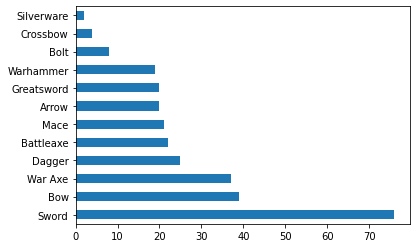

In [360]:
df["Type"].value_counts().plot.barh();#Type değişkenlerinin grafik hali

Type Sütununun grafik halinde bilgiler almak için

In [361]:
df.Perk.unique()#Perk değişkenleri 

['Steel', 'Daedric', 'Dragon', '-', 'Dwarven', ..., 'None', 'Advanced', 'Orcish', '–', NaN]
Length: 13
Categories (12, object): ['-', 'Advanced', 'Daedric', 'Dragon', ..., 'None', 'Orcish', 'Steel', '–']

In [362]:
df["Perk"].value_counts() # Type frekanslari neler

Steel       70
None        41
-           27
Dwarven     26
Ebony       16
Glass       16
Elven       13
Daedric     10
Orcish      10
Advanced     8
Dragon       8
–            6
Name: Perk, dtype: int64

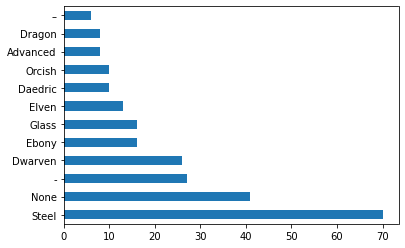

In [363]:
df["Perk"].value_counts().plot.barh();#Perk değişkenlerinin grafik hali

Perk Sütununun grafik halinde bilgiler almak için

In [364]:
df.Upgrade.unique()#Upgrade değişkenleri 

['Steel Ingot', 'Ebony Ingot', 'Dragon Bone', NaN, 'Dwarven Metal Ingot', ..., 'Daedra HeartEbony Ingot', 'Firewood', 'Silver Ingot', 'Leather Strips', 'Dwarven metal ingot']
Length: 19
Categories (18, object): ['3 Ectoplasm', 'Chaurus Chitin', 'Daedra HeartEbony Ingot', 'Dragon Bone', ..., 'Refined Moonstone', 'Silver Ingot', 'Stalhrim', 'Steel Ingot']

In [365]:
df["Upgrade"].value_counts() # Upgrade frekanslari neler

Steel Ingot                81
Ebony Ingot                36
Iron Ingot                 24
Refined Malachite          16
Quicksilver Ingot          14
Refined Moonstone          13
Orichalcum Ingot           10
Dwarven Metal Ingot         9
Stalhrim                    8
Dragon Bone                 8
Chaurus Chitin              3
Leather Strips              2
Firewood                    2
Dwarven metal ingot         2
None required               1
Silver Ingot                1
Daedra HeartEbony Ingot     1
3 Ectoplasm                 1
Name: Upgrade, dtype: int64

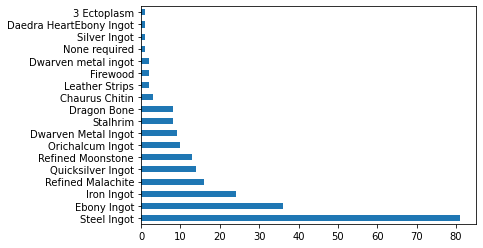

In [366]:
df["Upgrade"].value_counts().plot.barh();#Upgrade değişkenlerinin grafik hali 

In [367]:
df.Category.unique()#Category değişkenleri 

['Two-Handed', 'One-Handed', 'Archery']
Categories (3, object): ['Archery', 'One-Handed', 'Two-Handed']

In [368]:
df["Category"].value_counts() # Category frekanslari neler

One-Handed    161
Archery        71
Two-Handed     61
Name: Category, dtype: int64

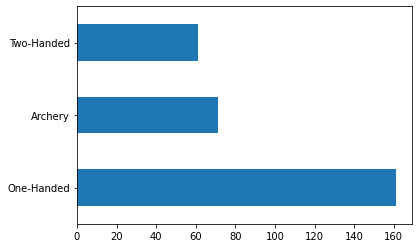

In [369]:
df["Category"].value_counts().plot.barh();#Upgrade değişkenlerinin grafik hali 

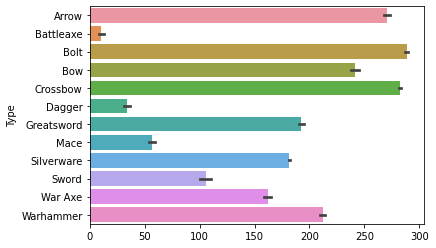

In [370]:
import seaborn as sns
sns.barplot(y = "Type", x = df.Type.index, data= df);

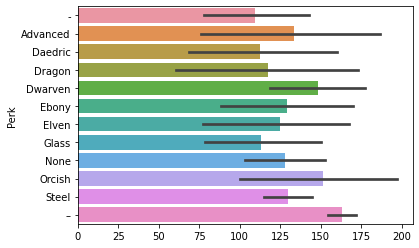

In [371]:
sns.barplot(y = "Perk", x = df.Perk.index, data= df);

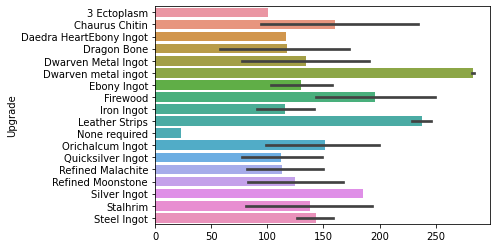

In [372]:
sns.barplot(y = "Upgrade", x = df.Perk.index, data= df);

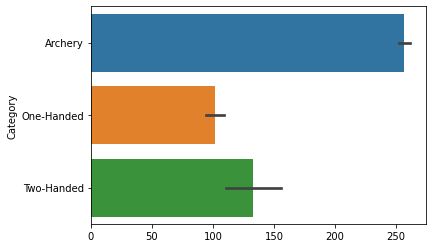

In [373]:
sns.barplot(y = "Category", x = df.Type.index, data= df);

aynını seaborn kutuphanesi ile daha gorsel olarak gerceklestirebiliriz

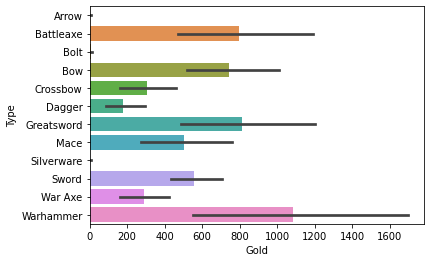

In [374]:
sns.barplot(y = "Type", x = "Gold", data= df);

Type sütununu y eksenine Gold sütununu x eksenine koyarak aralarındaki ilişkiyi görmek için

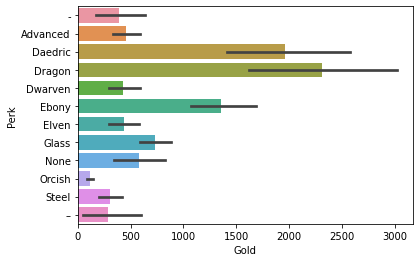

In [375]:
sns.barplot(y = "Perk", x = "Gold", data= df);

Perk sütununu y eksenine Gold sütununu x eksenine koyarak aralarındaki ilişkiyi görmek için

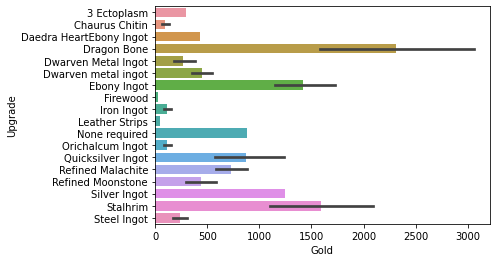

In [376]:
sns.barplot(y = "Upgrade", x = "Gold", data= df);

Upgrade sütununu y eksenine Gold sütununu x eksenine koyarak aralarındaki ilişkiyi görmek için

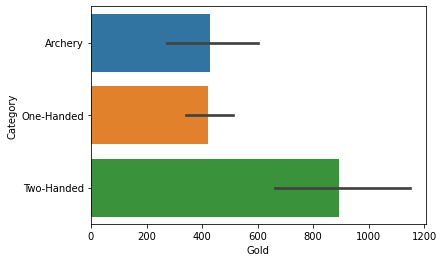

In [377]:
sns.barplot(y = "Category", x = "Gold", data= df);

Category sütununu y eksenine Gold sütununu x eksenine koyarak aralarındaki ilişkiyi görmek için

In [378]:
#Verileri karşılaştırmak için
from pandas.api.types import CategoricalDtype

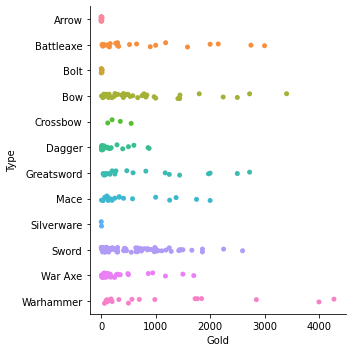

In [379]:
#Silahın tipinin fiyatına etkisini görmek istiyoruz
sns.catplot(x = "Gold", y = "Type", data = df);

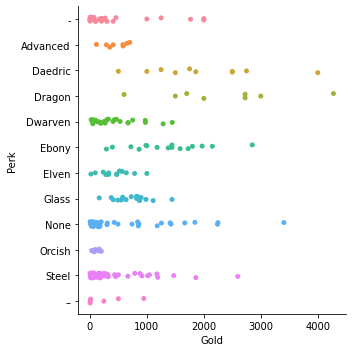

In [380]:
#Silahın Perk fiyatına etkisini görmek istiyoruz
sns.catplot(x = "Gold", y = "Perk", data = df);

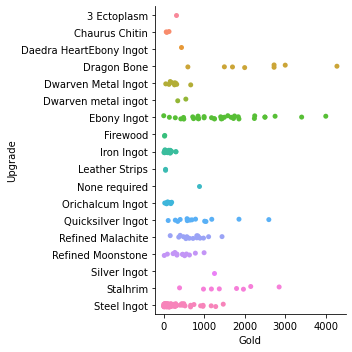

In [381]:
sns.catplot(x = "Gold", y = "Upgrade", data = df);

In [382]:
df.groupby(["Category","Type"])["Gold"].mean().head()

Category  Type     
Archery   Arrow          4.150000
          Battleaxe           NaN
          Bolt           8.000000
          Bow          742.871795
          Crossbow     305.000000
Name: Gold, dtype: float64

In [383]:
df.Category.head()

0    Two-Handed
1    Two-Handed
2    Two-Handed
3    Two-Handed
4    Two-Handed
Name: Category, dtype: category
Categories (3, object): ['Archery', 'One-Handed', 'Two-Handed']

# Histogram ve Yoğunluk Grafiğ

Eldeki sayısal değişkenleri görselleştirmek için kullanılır. Sayısal değişkenlerin dağılımını ifade eder.

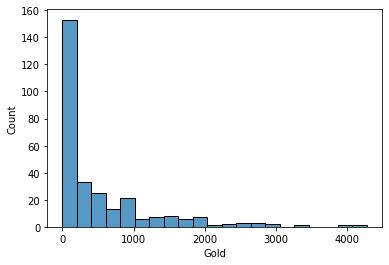

In [384]:
sns.histplot(df.Gold);

In [462]:
df["Gold"].describe()

count      39.000000
mean      742.871795
std       818.568139
min         5.000000
25%       175.000000
50%       458.000000
75%       905.000000
max      3405.000000
Name: Gold, dtype: float64

Ortalama =521.300341
Standart Sapma =732.009
Minimum Değer =0.000
Medyan =188.0
Maksimum Değer=4275.0

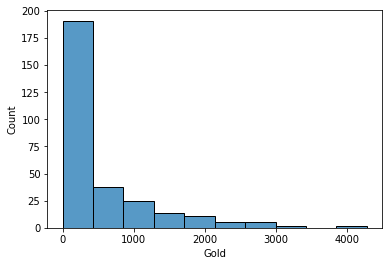

In [386]:
sns.histplot(df.Gold, bins = 10);

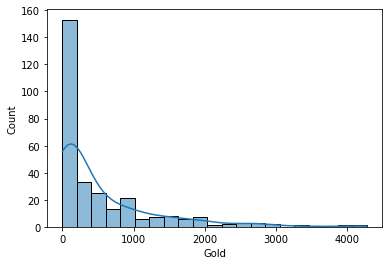

In [387]:
sns.histplot(df.Gold,kde=True); #kde olasılık yogunluk fonksiyonu

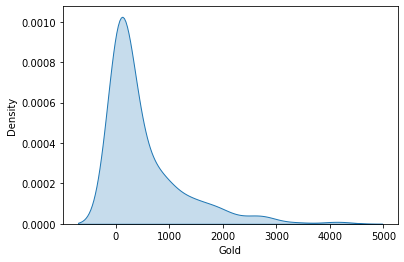

In [388]:
sns.kdeplot(df.Gold, shade = True);

Type

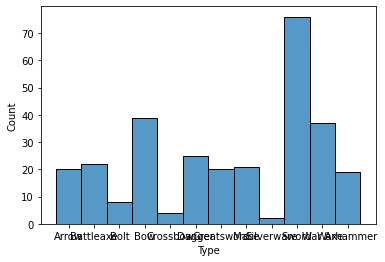

In [389]:
sns.histplot(df.Type);

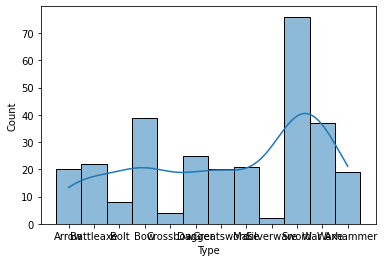

In [390]:
sns.histplot(df.Type,kde=True);

Perk

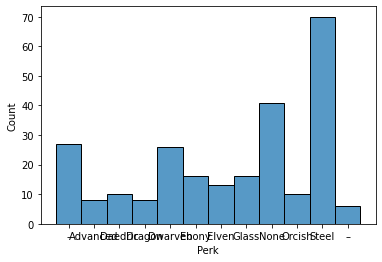

In [391]:
sns.histplot(df.Perk);

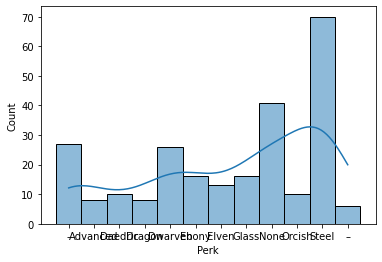

In [392]:
sns.histplot(df.Perk,kde=True);

#Weight

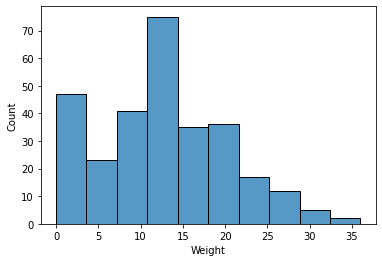

In [393]:
sns.histplot(df.Weight, bins = 10);

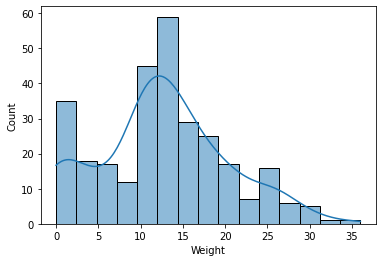

In [394]:
sns.histplot(df.Weight,kde=True);

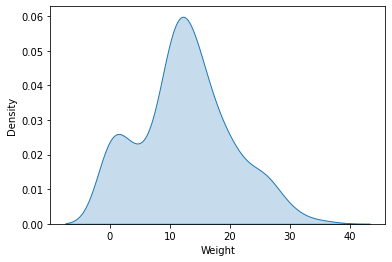

In [395]:
sns.kdeplot(df.Weight, shade = True);

# Histogram Grafiklerinin Çaprazlanması

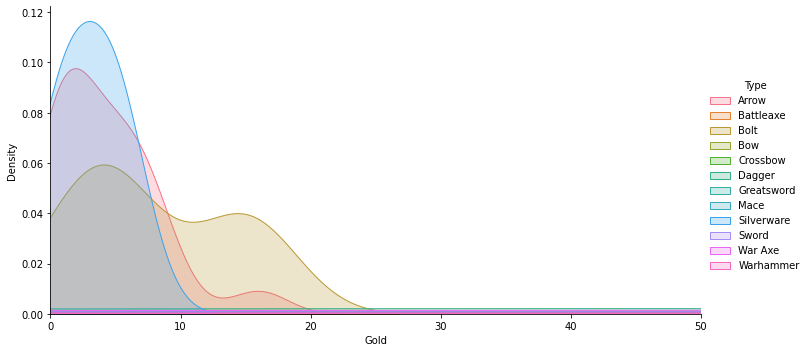

In [396]:
#Grafik üzerinde eklenen boyutları bölerek görüntülemek için kullanılır.
#ustte belirttigimiz grafigi map'leyerek facegrid'e uyguladik 
#boylece her bir Type degeri icin ayni yogunluk fonksiyonunu gözlemlemis olacagiz
(sns.FacetGrid(df,
              hue = "Type",
              height = 5, aspect=2,
              xlim = (0, 50))
 .map(sns.kdeplot, "Gold", shade= True)
 .add_legend()
);

WarAxe in 0-10 arası en yoğun olan
Bolt un yogunluğunu en fazla alana yayıldığını görüyoruz
Bolt,Bow,WarAxe in en fazla 0 ile 30 arasında görüldüğünü diye biliriz
0,50 arası

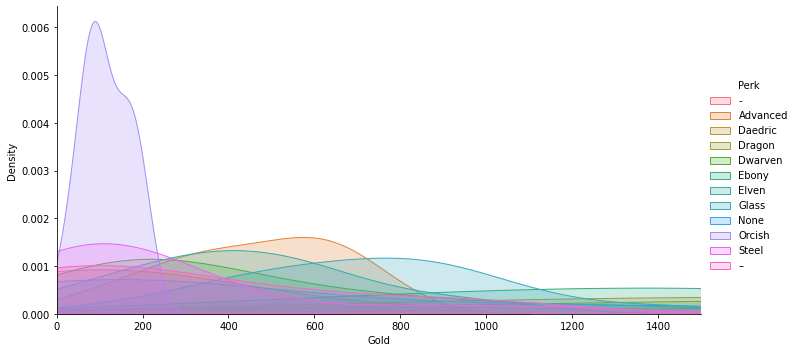

In [397]:
(sns.FacetGrid(df,
              hue = "Perk",
              height = 5, aspect=2,
              xlim = (0, 1500))
 .map(sns.kdeplot, "Gold", shade= True)
 .add_legend()
);

Orcish'in en fazla yoğunluğa sahip olduğunu görüyoruz 

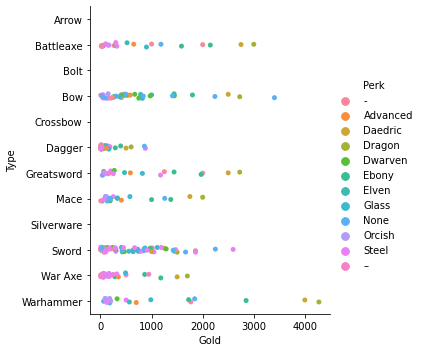

In [398]:
sns.catplot(x = "Gold", y = "Type", hue = "Perk", data = df);

En pahalı silahın Type'i Warhammer, Perk'i de Dragon olduğunu anlaya biliriz


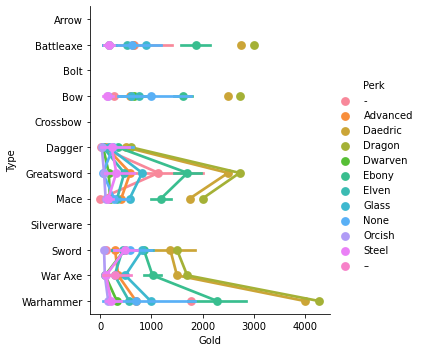

In [399]:
sns.catplot(x = "Gold", y = "Type", hue = "Perk", kind = "point", data = df);

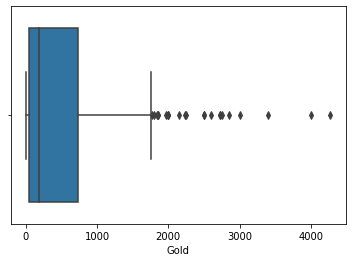

In [400]:
sns.boxplot(x = df["Gold"]);

Fiyatların 0 yakın ve 1000 arasında yoğunlukta ve ortalama 0 yakın olduğunu 2000 den sonrada uçuk değerler başlıyor
4000 den fazla gold değerine sahip silah olduğu sonucuna varabiliyoruz

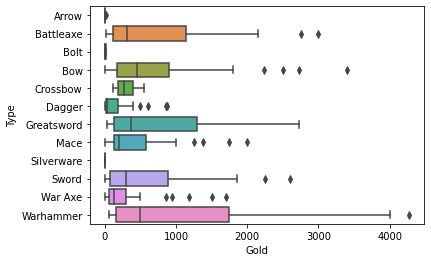

In [401]:
sns.boxplot(x = "Gold", y = "Type", data = df);

çoğu silahın ortalama Gold değeri 0 ile 1000 arasında ve 0 yakın olduğunu
21 tane uçuk değer olduğu sonucuna varıyoruz

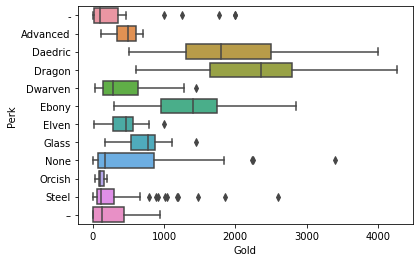

In [402]:
sns.boxplot(x = "Gold", y = "Perk", data = df);

Silahlara yapısının Gold değerini etkilediği sonucuna varabiliriz ve buradan varsayımlarda bulunabiliriz

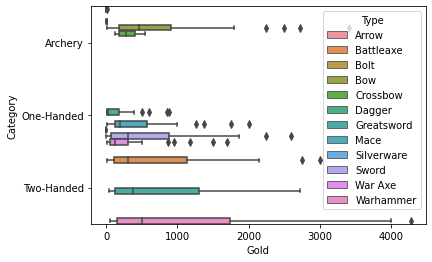

In [403]:
sns.boxplot(x = "Gold", y = "Category", hue = "Type", data = df,width=1);

Burada birden fazla sütunu birlikte değerlendirmeye çalıştım ama anlamlı bir sonuç çıkarmadı

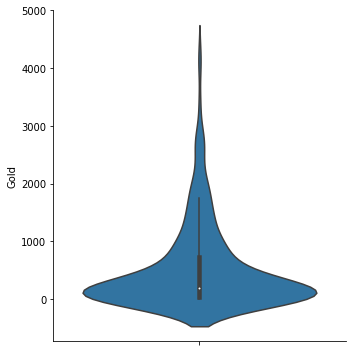

In [404]:
sns.catplot(y = "Gold", kind = "violin", data = df);

Yoğunluğu ve ortalamayı nereye yakın olduğunu ve hangi aralağa kadar gittiğini görüyoruz

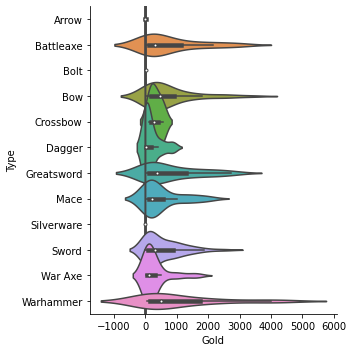

In [405]:
sns.catplot(x= "Gold", y = "Type", kind = "violin", data = df,width=200);

<AxesSubplot:xlabel='Gold', ylabel='Type'>

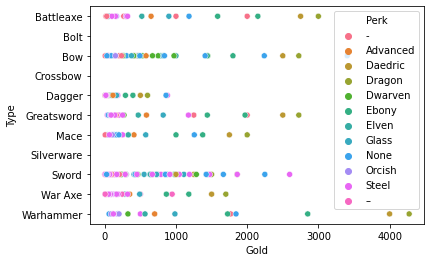

In [406]:
sns.scatterplot(x = "Gold", y = "Type", hue = "Perk", data = df)

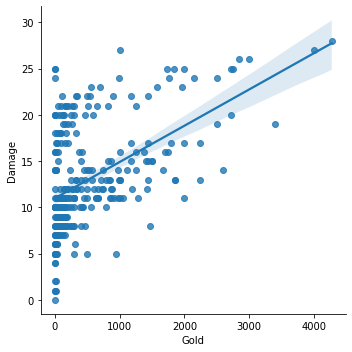

In [407]:
sns.lmplot(x = "Gold", y = "Damage", data = df);

Doğrusal İlişkinin Gösterilmesi
Damage arttıkça fiyattında artığını görebiliriz


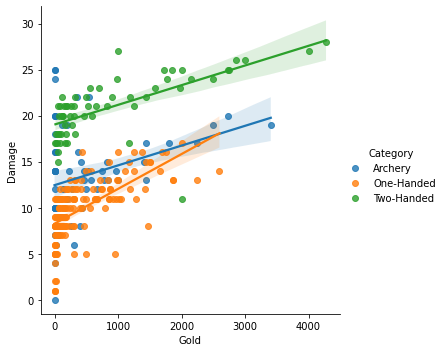

In [408]:
sns.lmplot(x = "Gold", y = "Damage", hue = "Category", data = df);

Damage'İ en fazla çift ellide vurduğunu 
Çift ellinin en az 10 civarı vurduğunu 

# Betimsel İstatistik

In [409]:
df.head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN


In [463]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Damage,39.0,12.820513,4.173045,6.0,10.000,13.00,15.000,25.0
Weight,39.0,12.051282,4.334371,5.0,9.000,12.00,15.000,20.0
Gold,39.0,742.871795,818.568139,5.0,175.000,458.00,905.000,3405.0
Speed,39.0,0.765923,0.165776,0.5,0.625,0.75,0.875,1.0


In [411]:
import researchpy as rp

In [472]:
#surekli (sayısal) değişkenler için kullanılır.
rp.summary_cont(df[["Damage","Weight","Gold"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Damage,39.0,12.8205,4.1730,0.6682,11.4678,14.1733
1,Weight,39.0,12.0513,4.3344,0.6941,10.6462,13.4563
2,Gold,39.0,742.8718,818.5681,131.0758,477.5227,1008.2209


Damage
eleman sayısı(N)=293.0
Ortalama(Mean)=13.0171
Standart Sapma(SD)=5.6927
Standart Hata(SE)=0.3326
%95 güven arakığı=12.3625-13.6716

Weight
eleman sayısı(N)=293.0
Ortalama(Mean)=12.5904
Standart Sapma(SD)=7.6498
Standart Hata(SE)=0.4469
%95 güven arakığı=11.7109-13.4700

Gold
eleman sayısı(N)=293.0
Ortalama(Mean)=521.3003
Standart Sapma(SD)=732.0096
Standart Hata(SE)=42.7645
%95 güven arakığı=437.1347-605.4660




In [413]:
#Damage
#a= mean+-(95%conf.*(sd/pow(N,1/2)))
a=13.0171 +- (12.9*(5.6927/pow(293,1/2)))
b=13.0171-a
c=13.0171+a
print(a)
print(b)
print(c)

8.726933003326351
4.290166996673648
21.74403300332635


In [414]:
#kategorik değişkenler için kullanılır.
rp.summary_cat(df[["Type","Perk","Category"]])

,Variable,Outcome,Count,Percent
0,Type,Sword,76,25.94
1,,Bow,39,13.31
2,,War Axe,37,12.63
3,,Dagger,25,8.53
4,,Battleaxe,22,7.51
5,,Mace,21,7.17
6,,Arrow,20,6.83
7,,Greatsword,20,6.83
8,,Warhammer,19,6.48
9,,Bolt,8,2.73


In [473]:
df[["Damage","Gold"]].cov()

,Damage,Gold
Damage,17.414305,2105.897436
Gold,2105.897436,670053.798920


In [474]:
df[["Damage","Gold"]].corr()

,Damage,Gold
Damage,1.000000,0.616495
Gold,0.616495,1.000000


In [475]:
df = df.select_dtypes(include = ['float64', 'int64']) #sadece sayısal değerleri alıyoruz
df = df.dropna()
df.head()

,Damage,Weight,Gold,Speed
222,8,12.0,45,0.875
223,7,7.0,50,0.937
224,13,11.0,1000,1.000
225,10,7.0,434,0.937
226,19,18.0,2500,0.500


In [476]:
df.mean()

Damage     12.820513
Weight     12.051282
Gold      742.871795
Speed       0.765923
dtype: float64

In [477]:
import statsmodels.stats.api as sms
sms.DescrStatsW(df.Damage).tconfint_mean() # %95 bu aralıkta Damage vuruyor

(11.467768103725525, 14.173257537300117)

In [478]:
sms.DescrStatsW(df.Weight).tconfint_mean() # %95 bu aralıkta Ağırlığa sahip

(10.64624141176625, 13.456322690797853)

In [479]:
sms.DescrStatsW(df.Gold).tconfint_mean() # %95 bu aralıkta Gold değerine sahip

(477.52270024728114, 1008.2208894963087)

In [480]:
sms.DescrStatsW(df.Speed).tconfint_mean() # %95 bu aralıkta Hıza sahip

(0.7121847825702436, 0.8196613712759102)

# Hipotez Testi

In [481]:
import scipy.stats as stats
stats.describe(df.Damage)

DescribeResult(nobs=39, minmax=(6, 25), mean=12.820512820512821, variance=17.41430499325236, skewness=0.465010157366275, kurtosis=0.42144461974717995)

nobs: gözlem sayısı =293
minmax: min=6, max=28
mean: ortalama=13.017064846416382
variance: varyans=32.407242040301085
skewness: çarpıklık=0.4971664045016941
kurtosis: basıklık=-0.32424387949365396



In [482]:
stats.describe(df.Weight)

DescribeResult(nobs=39, minmax=(5.0, 20.0), mean=12.051282051282051, variance=18.786774628879893, skewness=0.22006656021470805, kurtosis=-1.00084321649166)

nobs: gözlem sayısı =293
minmax: min=0.0, max=36.0
mean: ortalama=12.12.590443686006825
variance: varyans=58.52004535041378
skewness: çarpıklık=0.23249314604438903
kurtosis: basıklık=-0.22308669812830928

In [483]:
stats.describe(df.Gold)

DescribeResult(nobs=39, minmax=(5, 3405), mean=742.8717948717949, variance=670053.798920378, skewness=1.6417765797615742, kurtosis=2.087470627117596)

nobs: gözlem sayısı =293
minmax: min=0, max=4275
mean: ortalama=521.3003412969283
variance: varyans=535838.0053765954
skewness: çarpıklık=2.1612136498783943
kurtosis: basıklık=5.2224931292925785

# Normallik varsayımı

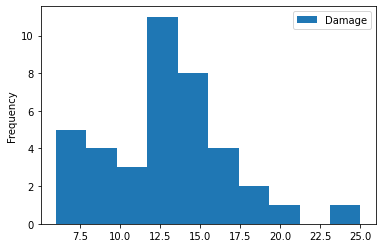

In [484]:
pd.DataFrame(df.Damage).plot.hist();


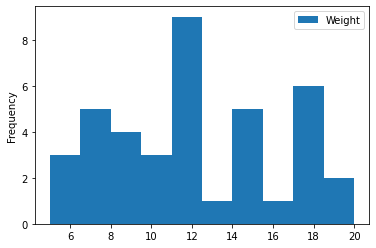

In [485]:
pd.DataFrame(df.Weight).plot.hist();

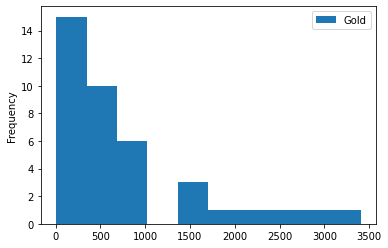

In [486]:
pd.DataFrame(df.Gold).plot.hist();

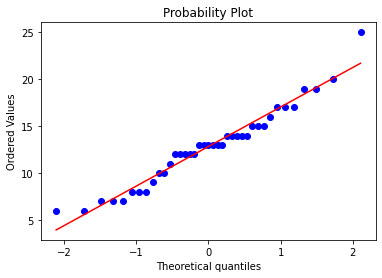

In [487]:
#qqplot
import pylab
stats.probplot(df.Damage, dist="norm", plot=pylab)
pylab.show()

Not: üstteki grafik incelendiğinde de normal dağılım varsayımının sağlandığı gözlemlenmektedir.
sol kısım örnek dağılımını (elimizdeki ölçümler), alt kısım teorik dağılımı (şu an ilgilendiğimiz normal dağılım) ifade eder.

elimizdeki noktalar kırmızı çizgi etrafında yoğunlaşmışsa dağılımın normal olduğunu söyleyebiliriz.

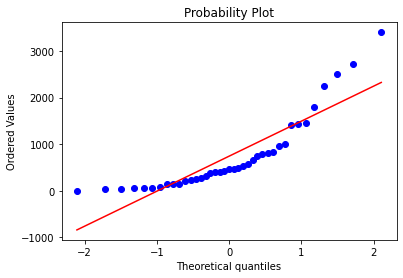

In [488]:
stats.probplot(df.Gold, dist="norm", plot=pylab)
pylab.show()

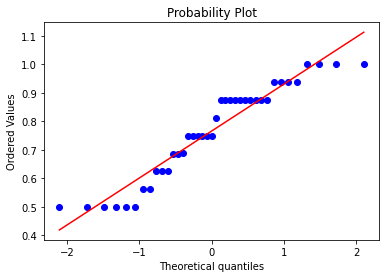

In [489]:
import pylab
stats.probplot(df.Speed, dist="norm", plot=pylab)
pylab.show()

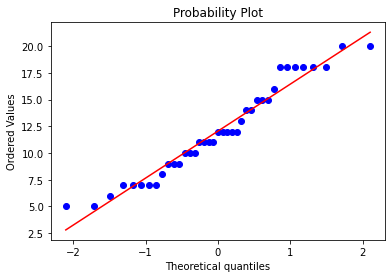

In [490]:
import pylab
stats.probplot(df.Weight, dist="norm", plot=pylab)
pylab.show()
#Veribilimi05 in[7]

# Shapiro-Wilks Testi

p-value değeri

P değeri bir karşılaştırmada “istatistiksel anlamlı fark vardır” kararı vereceğimiz zaman yapacağımız olası hata miktarını gösterir. Ünlü bir istatistikçi olan Fisher tarafından bu hatanın maksimum kabul edilebilir düzeyi 0,05 olarak önerilmiş ve kabul görmüştür. Bir test sonucunda bulunan P değeri 0,05'in altında bir değer ise karşılaştırma sonucunda anlamlı farklılık bulunduğu anlamına gelir.



In [491]:
from scipy.stats import shapiro
shapiro(df.Damage)

ShapiroResult(statistic=0.9593865871429443, pvalue=0.17011688649654388)

In [492]:
print("T Hesap İstatistiği: " + str(shapiro(df.Damage)[0]))
print("Hesaplanan P-value: " + str(shapiro(df.Damage)[1]))

T Hesap İstatistiği: 0.9593865871429443
Hesaplanan P-value: 0.17011688649654388


In [493]:
print("T Hesap İstatistiği: " + str(shapiro(df.Gold)[0]))
print("Hesaplanan P-value: " + str(shapiro(df.Gold)[1]))

T Hesap İstatistiği: 0.7946175336837769
Hesaplanan P-value: 6.52365451969672e-06


In [494]:
print("T Hesap İstatistiği: " + str(shapiro(df.Speed)[0]))
print("Hesaplanan P-value: " + str(shapiro(df.Speed)[1]))

T Hesap İstatistiği: 0.9073466658592224
Hesaplanan P-value: 0.0036078665871173143


In [495]:
print("T Hesap İstatistiği: " + str(shapiro(df.Weight)[0]))
print("Hesaplanan P-value: " + str(shapiro(df.Weight)[1]))

T Hesap İstatistiği: 0.9494264125823975
Hesaplanan P-value: 0.07859785109758377


Burada p-value değeri 0.05'den küçük çıksaydı H0 hipotezini reddedebilirdik.

# Varsayım kontrolü

In [496]:
shapiro(df.Damage)

ShapiroResult(statistic=0.9593865871429443, pvalue=0.17011688649654388)

In [497]:
shapiro(df.Weight)

ShapiroResult(statistic=0.9494264125823975, pvalue=0.07859785109758377)

In [498]:
shapiro(df.Gold)

ShapiroResult(statistic=0.7946175336837769, pvalue=6.52365451969672e-06)

In [499]:
shapiro(df.Speed)

ShapiroResult(statistic=0.9073466658592224, pvalue=0.0036078665871173143)

# Varyans homojenliği varsayımı

In [500]:
stats.levene(df.Damage, df.Gold)

LeveneResult(statistic=25.44165390992892, pvalue=3.0187427239625035e-06)

 p-value değerine bakarak:

H0: varyanslar homojendir hipotezini redediyoruz. dolayısıyla varsayım sağlanmaktadır.

# Aykırı değer bulma 

In [589]:
df2=df.copy()

In [590]:
df2 = df2.select_dtypes(include = ['float64', 'int64']) #sadece sayısal değerleri alıyoruz
df2 = df2.dropna()
df2.head()

,Damage,Weight,Gold,Speed
222,8,12.0,45,0.875
223,7,7.0,50,0.937
224,13,11.0,1000,1.000
225,10,7.0,434,0.937
226,19,18.0,2500,0.500


In [591]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Damage,39.0,12.820513,4.173045,6.0,10.000,13.00,15.000,25.0
Weight,39.0,12.051282,4.334371,5.0,9.000,12.00,15.000,20.0
Gold,39.0,742.871795,818.568139,5.0,175.000,458.00,905.000,3405.0
Speed,39.0,0.765923,0.165776,0.5,0.625,0.75,0.875,1.0


In [592]:
df_Damage=df["Damage"]
df_Damage.head()

222     8
223     7
224    13
225    10
226    19
Name: Damage, dtype: int64

In [593]:
df_Weight = df["Weight"]
df_Weight.head()

222    12.0
223     7.0
224    11.0
225     7.0
226    18.0
Name: Weight, dtype: float64

In [594]:
df_Gold = df["Gold"]
df_Gold.head()

222      45
223      50
224    1000
225     434
226    2500
Name: Gold, dtype: int64

In [595]:
df_Speed = df["Speed"]
df_Speed.head()

222    0.875
223    0.937
224    1.000
225    0.937
226    0.500
Name: Speed, dtype: float64

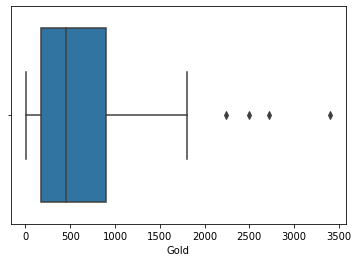

In [596]:
sns.boxplot(x = df_Gold);

Uç değerler olduğunu söyleyebiliriz 

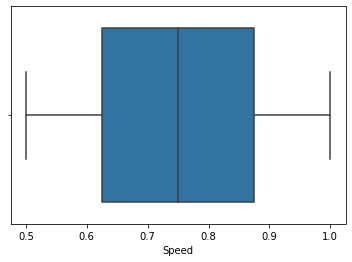

In [597]:
sns.boxplot(x = df_Speed );

uç değerin olmadığını söyleyebiliriz 

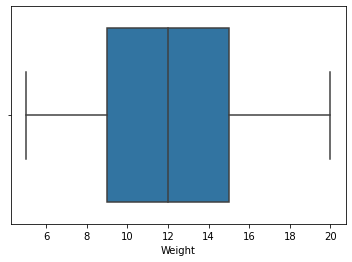

In [598]:
sns.boxplot(x = df_Weight );

Uç değerin olmadığını söyleyebiliriz 

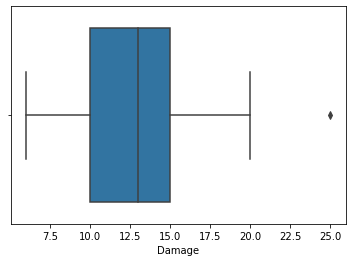

In [599]:
sns.boxplot(x =df_Damage);

In [600]:
Q1 = df_Gold.quantile(0.25)
Q3 = df_Gold.quantile(0.75)
IQR = Q3-Q1

In [601]:
print(Q1)
print(Q3)
print(IQR)

175.0
905.0
730.0


In [602]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [603]:
print(alt_sinir)
print(ust_sinir)

-920.0
2000.0


In [604]:
(df_Gold < alt_sinir) | (df_Gold > ust_sinir)

222    False
223    False
224    False
225    False
226     True
227     True
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258     True
259     True
260    False
Name: Gold, dtype: bool

In [605]:
aykiri_Gold = (df_Gold < alt_sinir) | (df_Gold > ust_sinir)
df_Gold[aykiri_Gold]

226    2500
227    2725
258    2240
259    3405
Name: Gold, dtype: int64

In [606]:
df_Gold[aykiri_Gold].index

Int64Index([226, 227, 258, 259], dtype='int64')

In [607]:
S1 = df_Speed.quantile(0.25)
S3 = df_Speed.quantile(0.75)
ISR = S3-S1
print(S1)
print(S3)
print(ISR)
alt_Speed_sinir = S1- 1.5*ISR
ust_Speed_sinir = S3 + 1.5*ISR
print(alt_Speed_sinir)
print(ust_Speed_sinir)

0.625
0.875
0.25
0.25
1.25


In [608]:
(df_Speed < alt_Speed_sinir) | (df_Speed > ust_Speed_sinir)

222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
Name: Speed, dtype: bool

In [609]:
D1 = df_Damage.quantile(0.25)
D3 = df_Damage.quantile(0.75)
IDR = D3-D1
print(D1)
print(D3)
print(IDR)
alt_Damage_sinir = D1- 1.5*IDR
ust_Damage_sinir = D3 + 1.5*IDR
print(alt_Damage_sinir)
print(ust_Damage_sinir)

10.0
15.0
5.0
2.5
22.5


In [610]:
(df_Damage < alt_Speed_sinir) | (df_Damage > ust_Speed_sinir)

222    True
223    True
224    True
225    True
226    True
227    True
228    True
229    True
230    True
231    True
232    True
233    True
234    True
235    True
236    True
237    True
238    True
239    True
240    True
241    True
242    True
243    True
244    True
245    True
246    True
247    True
248    True
249    True
250    True
251    True
252    True
253    True
254    True
255    True
256    True
257    True
258    True
259    True
260    True
Name: Damage, dtype: bool

In [611]:
W1 = df_Weight.quantile(0.25)
W3 = df_Weight.quantile(0.75)
IWR = W3-W1
print(W1)
print(W3)
print(IWR)
alt_Weight_sinir = W1- 1.5*IWR
ust_Weight_sinir = W3 + 1.5*IWR
print(alt_Weight_sinir)
print(ust_Weight_sinir)

9.0
15.0
6.0
0.0
24.0


In [612]:
(df_Weight < alt_Weight_sinir) | (df_Weight > ust_Weight_sinir)

222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
Name: Weight, dtype: bool

#  Aykırı Değerler Sorununun Çözülmesi

In [613]:
df_Gold[aykiri_Gold]

226    2500
227    2725
258    2240
259    3405
Name: Gold, dtype: int64

In [614]:
type(df_Gold)

pandas.core.series.Series

In [615]:
df_Gold = pd.DataFrame(df_Gold)
df_Gold.shape

(39, 1)

In [616]:
#aykırı olmayanları seçiyoruz
t_df = df_Gold[~((df_Gold < (alt_sinir)) | (df_Gold > (ust_sinir))).any(axis = 1)]
t_df.shape

(35, 1)

# Ortalama ile Doldurma

In [617]:
aykiri_Gold

222    False
223    False
224    False
225    False
226     True
227     True
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258     True
259     True
260    False
Name: Gold, dtype: bool

In [618]:
df_Gold[aykiri_Gold]

,Gold
226,2500
227,2725
258,2240
259,3405


In [619]:
df_Gold
type(df_Gold)

pandas.core.frame.DataFrame

In [620]:
df_Gold.mean()

Gold    742.871795
dtype: float64

In [621]:
df_Gold[aykiri_Gold] = df_Gold.mean()

TypeError: 'slice' object is not subscriptable

In [622]:
df_Gold[aykiri_Gold]=742.871795

In [623]:
df_Gold

,Gold
222,45.000000
223,50.000000
224,1000.000000
225,434.000000
226,742.871795
227,742.871795
228,458.000000
229,50.000000
230,270.000000
231,1446.000000


In [624]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Damage,39.0,12.820513,4.173045,6.0,10.000,13.00,15.000,25.0
Weight,39.0,12.051282,4.334371,5.0,9.000,12.00,15.000,20.0
Gold,39.0,742.871795,818.568139,5.0,175.000,458.00,905.000,3405.0
Speed,39.0,0.765923,0.165776,0.5,0.625,0.75,0.875,1.0


# Silme

In [625]:
df3=df.copy()

In [626]:
df3_Gold = df3["Gold"]
df3_Gold.head()

222      45
223      50
224    1000
225     434
226    2500
Name: Gold, dtype: int64

In [627]:
gg1 = df3_Gold.quantile(0.25)
gg3 = df3_Gold.quantile(0.75)
gggR = gg3-gg1
print(gg1)
print(gg3)
print(gggR)
alt3_Gold_sinir = gg1- 1.5*gggR
ust3_Gold_sinir = gg3 + 1.5*gggR
print(alt3_Gold_sinir)
print(ust3_Gold_sinir)

175.0
905.0
730.0
-920.0
2000.0


In [628]:
df3_Gold = pd.DataFrame(df3_Gold)
df3_Gold.shape

(39, 1)

In [629]:
#aykırı olmayanları seçiyoruz
t_df3 = df3_Gold[~((df3_Gold < (alt3_Gold_sinir)) | (df3_Gold > (ust3_Gold_sinir))).any(axis = 1)]
t_df3.shape

(35, 1)

# Baskılama Yöntemi

In [630]:
df4=df.copy()

In [631]:
df4_Gold = df4["Gold"]
df4_Gold.head()

222      45
223      50
224    1000
225     434
226    2500
Name: Gold, dtype: int64

In [633]:
aykiri4_Gold = (df4_Gold < alt_sinir) | (df4_Gold > ust_sinir)
df4_Gold[aykiri4_Gold]

226    2500
227    2725
258    2240
259    3405
Name: Gold, dtype: int64

In [634]:
alt4_Gold_sinir=alt_sinir
ust4_Gold_sinir=ust_sinir

In [635]:
aykiri4_alt = (df4_Gold < alt4_Gold_sinir) 
aykiri4_ust= (df4_Gold > ust4_Gold_sinir)
df4_Gold[aykiri4_alt] = alt4_Gold_sinir
df4_Gold[aykiri4_ust] = ust4_Gold_sinir

C:\Users\User\AppData\Local\Temp/ipykernel_15096/27438232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_Gold[aykiri4_alt] = alt4_Gold_sinir
C:\Users\User\AppData\Local\Temp/ipykernel_15096/27438232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_Gold[aykiri4_ust] = ust4_Gold_sinir


In [636]:
df4_Gold[aykiri4_Gold]

226    2000
227    2000
258    2000
259    2000
Name: Gold, dtype: int64

# makine ögrenmesi

In [119]:
df.isnull().values.any()

False

Değerlerin NaN olup olmadığına bakıyoruz

In [121]:
df.corr()
#bagimsiz degiskenlerin (Damage, Type, Perk) bagimli degisken (Gold) uzerindeki etkisine dikkat

,Damage,Weight,Gold,Speed
Damage,1.000000,0.613041,0.616495,-0.656327
Weight,0.613041,1.000000,0.573820,-0.405975
Gold,0.616495,0.573820,1.000000,-0.569465
Speed,-0.656327,-0.405975,-0.569465,1.000000


Speed sütununda çok fazla NaN değeri olduğu için o sütunu görmezden geleceğim
************
Damage'in Gold üzerine olan etkisi 0.616495
weight'in Gold üzerine olan etkisi 0.573820

Damage'in Gold değerine olan etkisi Weight'inkinde daha fazla olduğunu söyleyebiliriz

korelasyon, değişkenlerin ilişkisine bakıyoruz

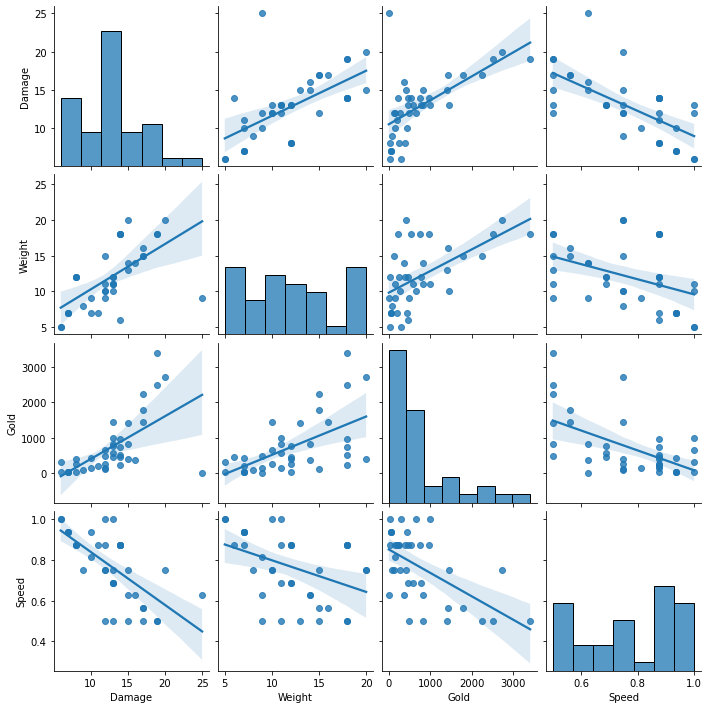

In [122]:
sns.pairplot(df, kind  ="reg");

Değişkenlerin birbirleri ile ilişkisini grafik olarak bakıyoruz

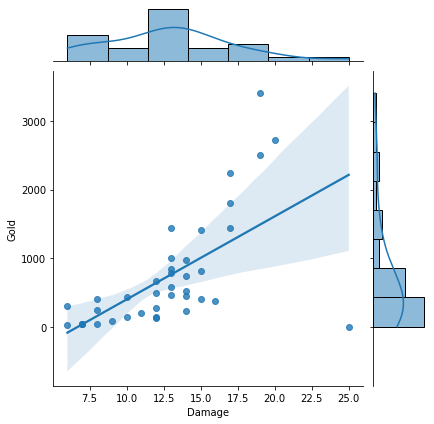

In [637]:
sns.jointplot(x = "Damage", y = "Gold", data = df, kind = "reg")

𝑌: Çıktı, bağımlı, sonuç, etkilenen değişken
𝑋: Girdi, bağımsız, neden(faktör), etkileyen değişken

Burada bizim Damage'imiz bağımsız değişken, Gold ise bağımlı değişken 

bağımsız değişkeni bağımsız değişkne üzerindeki etkisini yukarıdaki grafikte yorumlayabiliriz.



In [145]:
from warnings import filterwarnings
filterwarnings('ignore')
#uyarıları kapatmak icin

### Statsmodels ile modelleme

In [641]:
import statsmodels.api as sm
X = df[["Damage"]]
X[0:5]

,Damage
222,8
223,7
224,13
225,10
226,19


In [642]:
#elinizde tek degiskenli bir matris var ve regresyon problemini cozmek icin, matris islemlerinin yapilabilmesi icin
#matrise sabit 1 ifadesi eklememiz gerekiyor (beta0 için kullanacagiz).
X = sm.add_constant(data=X)
X[0:5]

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Damage
222,1.0,8
223,1.0,7
224,1.0,13
225,1.0,10
226,1.0,19


In [643]:
#bağımsız değişkenimizi de alıyoruz
y = df["Gold"]
y[0:5]

222      45
223      50
224    1000
225     434
226    2500
Name: Gold, dtype: int64

In [644]:
#modelin kurulması
lm = sm.OLS(y,X)
#modelin fit edilmesi
model = lm.fit()
#model ciktilarinin alinmasi
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Gold   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     22.68
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.93e-05
Time:                        11:38:27   Log-Likelihood:                -307.10
No. Observations:                  39   AIC:                             618.2
Df Residuals:                      37   BIC:                             621.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -807.5022    341.911     -2.362      0.024   -1500.279    -114.725
Damage       120.9292     25.391      4.763      0.000      69.483     172.376
==============================================================================
Omnibus:                        9.336   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               21.021
Skew:                          -0.119   Prob(JB):                     2.73e-05
Kurtosis:                       6.589   Cond. No.                         44.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: Bağımsız değişkenin, bağımlı değişkendeki değişkenliği açıklama başarısı. bu veri setinde %38
R-karenin düşük çıkması Damage'in Gold değerine olan etkisinin az olduğunu gösteriyor 
***
Adj. R-squared: R'karenin her parametre eklendiğinde artmasına olan duyarlılığının törpülenmiş halidir.

***
F-statistic: Modelin anlamlılığının ifade edilmesi için kullanılan bir test istatistiğidir.
***
Prob (F-statistic): F istatistiğinin p-value değeridir.
***
const: coef'le kesiştiği noktada beta0 değerini ifade etmektedir. Diğer değişkenlerde herhangi bir değişiklik olmadığında y'nin beklenen değerini ifade eder. beta0 eğrinin y eksenini kestiği noktayı ifade ediyordu.

In [645]:
#sadece katsayıları görelim 
model.params

const    -807.502170
Damage    120.929169
dtype: float64

In [646]:
#katsayı detaylarını görelim
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-807.5022,341.911,-2.362,0.024,-1500.279,-114.725
Damage,120.9292,25.391,4.763,0.000,69.483,172.376


In [647]:
#katsayıların güven aralıkları
model.conf_int()

,0,1
const,-1500.278870,-114.725470
Damage,69.482833,172.375505


In [648]:
#modelin anlamlılığına dair p-value değerini görelim
model.f_pvalue

2.929069785566786e-05

In [649]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [650]:
#f istatistiği
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  22.68


In [651]:
model.mse_model

9677248.243041318

In [652]:
#düzeltilmiş rkare değeri
model.rsquared_adj

0.3633106596383492

In [653]:
#modelden tahmin edilen y değerleri
model.fittedvalues[0:5]

222     159.931184
223      39.002015
224     764.577030
225     401.789523
226    1490.152046
dtype: float64

In [654]:
#gercek y degerleri
y[0:5]

222      45
223      50
224    1000
225     434
226    2500
Name: Gold, dtype: int64

In [655]:
#model denklemi
print("Gold = " +  str("%.2f" % model.params[0]) + " + Damage" + "*" + str("%.2f" % model.params[1]))

Gold = -807.50 + Damage*120.93


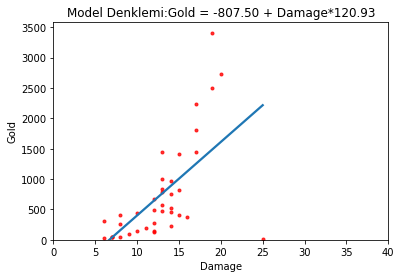

In [660]:
#modelin görsel olarak ifade edilmesi
g = sns.regplot(df["Damage"], df["Gold"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi:Gold = -807.50 + Damage*120.93")
g.set_ylabel("Gold")
g.set_xlabel("Damage")
import matplotlib.pyplot as plt
plt.xlim(0,40)
plt.ylim(bottom=0);

# sklearn ile modelleme

In [661]:
#aynı işlemin sklearn kutuphanesi ile yapılması
from sklearn.linear_model import LinearRegression

X = df[["Damage"]]
y = df["Gold"]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

-807.5021698698083
[120.92916925]


In [662]:
model.score(X,y)

0.3800656422794453

In [663]:
model.predict(X)[0:10]

array([ 159.93118413,   39.00201488,  764.57703038,  401.78952263,
       1490.15204588, 1611.08121513,  885.50619963,   39.00201488,
        643.64786113,  764.57703038])

In [664]:
y[0:10]

222      45
223      50
224    1000
225     434
226    2500
227    2725
228     458
229      50
230     270
231    1446
Name: Gold, dtype: int64

# Tahmin
Damage değeri 25 olan bir silahın Gold değerini tahmin etmeye çalışırsak
Model denklemi:-807.50 + Damage*120.93

In [665]:
-807.50 + 25*120.93

2215.75

In [666]:
from sklearn.linear_model import LinearRegression
X = df[["Damage"]]
y = df["Gold"]
reg = LinearRegression()
model = reg.fit(X, y)
model.predict([[25]])
#usttekinden farklı olma sebebi virgülden sonraki yuvarlama işlemimizden kaynaklanıyor

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2215.72706138])

### Artıklar ve Makine Öğrenmesindeki Önemi

In [179]:
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.formula.api as smf
lm = smf.ols("Weight ~ Damage", df)
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     22.28
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           3.34e-05
Time:                        09:49:50   Log-Likelihood:                -102.84
No. Observations:                  39   AIC:                             209.7
Df Residuals:                      37   BIC:                             213.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8879      1.817      2.140      0.039       0.207       7.569
Damage         0.6367      0.135      4.720      0.000       0.363       0.910
==============================================================================
Omnibus:                        5.127   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.109
Skew:                          -0.489   Prob(JB):                        0.128
Kurtosis:                       4.254   Cond. No.                         44.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
mse

470682.272538231

In [181]:
import numpy as np
rmse = np.sqrt(mse)
rmse

686.0628779771072

In [182]:
model.predict(X)[0:10]

222     8.981866
223     8.345126
224    12.165569
225    10.255347
226    15.986012
227    16.622753
228    12.802309
229     8.345126
230    11.528828
231    12.165569
dtype: float64

In [183]:
y[0:10]

222      45.0
223      50.0
224    1000.0
225     434.0
226     742.0
227     742.0
228     458.0
229      50.0
230     270.0
231    1446.0
Name: Gold, dtype: float64

In [184]:
#karşılaştırma tablosu
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
222,45.0,8.981866
223,50.0,8.345126
224,1000.0,12.165569
225,434.0,10.255347
226,742.0,15.986012
227,742.0,16.622753
228,458.0,12.802309
229,50.0,8.345126
230,270.0,11.528828
231,1446.0,12.165569


In [185]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
222,45.0,8.981866,36.018134
223,50.0,8.345126,41.654874
224,1000.0,12.165569,987.834431
225,434.0,10.255347,423.744653
226,742.0,15.986012,726.013988
227,742.0,16.622753,725.377247
228,458.0,12.802309,445.197691
229,50.0,8.345126,41.654874
230,270.0,11.528828,258.471172
231,1446.0,12.165569,1433.834431


In [186]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
222,45.0,8.981866,36.018134,1.297306e+03
223,50.0,8.345126,41.654874,1.735129e+03
224,1000.0,12.165569,987.834431,9.758169e+05
225,434.0,10.255347,423.744653,1.795595e+05
226,742.0,15.986012,726.013988,5.270963e+05
227,742.0,16.622753,725.377247,5.261722e+05
228,458.0,12.802309,445.197691,1.982010e+05
229,50.0,8.345126,41.654874,1.735129e+03
230,270.0,11.528828,258.471172,6.680735e+04
231,1446.0,12.165569,1433.834431,2.055881e+06


In [187]:
#toplam hata
np.sum(k_t["hata_kare"])

4534301.925381198

In [188]:
#hata kareler ortalaması
np.mean(k_t["hata_kare"])

453430.19253811974

In [189]:
#hata kareler ortalamasının karekoku
np.sqrt(np.mean(k_t["hata_kare"]))

673.3722540602039

burada elde edilen hata katsayıları kullanılarak sonraki modellerin parametre optimizasyonları yapılır.

In [190]:
#her bir tahmin için artıklar (hatalar)
model.resid[0:10]

222    3.018134
223   -1.345126
224   -1.165569
225   -3.255347
226    2.013988
227    3.377247
228   -6.802309
229   -1.345126
230   -1.528828
231   -2.165569
dtype: float64

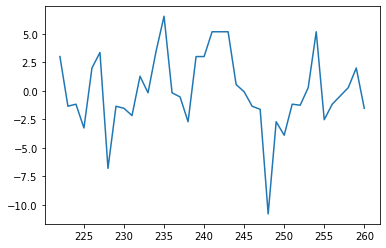

In [191]:
#artıkların görselleştirilmesi
#bu hatalar verisetindeki aykırı değerlerden mi kaynaklanıyor gibi soruların sorulabileceği 
#ve bu sorulara yanıt aramaya bizi sevk edecek gözlemler
plt.plot(model.resid)

### K En Yakın Komşu (KNN)

In [670]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm
#conda install -c conda-forge lightgbm

In [671]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler


from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor

from warnings import filterwarnings
filterwarnings('ignore')

from datetime import datetime

In [672]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Damage,39.0,12.820513,4.173045,6.0,10.000,13.00,15.000,25.0
Weight,39.0,12.051282,4.334371,5.0,9.000,12.00,15.000,20.0
Gold,39.0,742.871795,818.568139,5.0,175.000,458.00,905.000,3405.0
Speed,39.0,0.765923,0.165776,0.5,0.625,0.75,0.875,1.0


In [675]:
dms = pd.get_dummies(df[['Damage', 'Weight']])
y = df["Gold"]
X_ = df.drop(['Gold','Damage', 'Weight'], axis=1).astype('float64')
X = pd.concat([X_, dms[['Damage', 'Weight']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [676]:
knn_model

KNeighborsRegressor()

In [677]:
knn_model.n_neighbors #default değeri 5

5

In [678]:
knn_model.effective_metric_

'euclidean'

### Tahmin

In [692]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


test hatası: 782.4971897713116
k = 1 için RMSE değeri:  130.91113068769604
k = 2 için RMSE değeri:  245.67196730038486
k = 3 için RMSE değeri:  341.8825502433834
k = 4 için RMSE değeri:  382.9693902641703
k = 5 için RMSE değeri:  443.87253684533954
k = 6 için RMSE değeri:  466.6507766178126
k = 7 için RMSE değeri:  504.62825762683576
k = 8 için RMSE değeri:  530.3515348698381
k = 9 için RMSE değeri:  552.982323002283
k = 10 için RMSE değeri:  579.2847599440609
